# GDP decomposition

Following Freitas and Dweck (2013):

$$
Y + M = C_{HND} + C_{HD} + I_H + C_G + I_G + I_{SE} + I_{PE} + X
$$

$$
M = (1-\mu)(C_{HND} + C_{HD} + I_H + C_G + I_G + I_{SE} + I_{PE} + X)
$$

$$
C_{NHD} = cY \Rightarrow h = \frac{C_{NHD}}{Y}
$$

$$
I_{PE} = hY \Rightarrow h = \frac{I_{PE}}{Y}
$$

$$
Z = C_{HD} + I_H + C_G + I_G + I_{SE} + X
$$

$$
\alpha = \frac{\mu}{1-\mu (c+h)}
$$

Decomposition formula:

\begin{equation}
g = \frac{\alpha (1)}{Y(0)} \bigg[ C_{HND} (0)\cdot g_c + I_{PE}(0)\cdot g_h + C_{HD}(0)\cdot g_{C_{HD}} + I_H(0)\cdot g_{I_H}+ C_{G}(0)\cdot g_{C_{G}} + I_{G}(0)\cdot g_{I_{G}} + I_{SE}(0)\cdot g_{I_{SE}} + X(0)\cdot g_{X} + E(0)\cdot g_{E}\bigg] + \frac{\alpha(1)}{\mu(1)}g_{\mu}
\end{equation}

# Getting data

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import datetime
import numpy as np

start = datetime.datetime(1940, 1, 1)
end = datetime.datetime(2017, 12, 31)

In [2]:
df = web.get_data_fred(
    [
        'GDPA',
        'IMPGSA',
        'PCNDA',
        'PCDGA',
        'PCESVA',
        'PRFIA',
        'A955RC1A027NBEA',
        'A782RC1A027NBEA',
#        'DDEI08USA156NWDB',
        'PNFIA',
        'EXPGSA',
        'CBIA',
    ], 
    start, end)
df.columns = [
    'Gross Domestic Product', # Not Seasonally Adjusted (Anual)
    'Imports', # Imports of Goods and Services, Not Seasonally Adjusted (Anual)
    'Nondurable goods', # Household supplies, Not Seasonally Adjusted (Anual)
    'Durable goods', # Furnishings and durable household equipment, Not Seasonally Adjusted (Anual)
    'Services', # Personal Consumption Expenditures: Services
    'Gross fixed investment residential', # Private Residential Fixed Investment, Not Seasonally Adjusted (Anual)
    'Government consumption', # Government consumption expenditures, Not Seasonally Adjusted (Anual)
    'Gross government investment', # Gross government investment, Not Seasonally Adjusted (Anual)
#    'Credit to Government and State-Owned Enterprises', # Credit to Government and State-Owned Enterprises, Not Seasonally Adjusted (Anual)
    'Private Domestic Investment',
    'Exports', # Exports of Goods and Services, Not Seasonally Adjusted (Anual)
    'Inventory change',
]

In [3]:
recessions = web.get_data_fred('USRECM', start, end)
recessions.columns = ['Recessions']
recessions['xmin'] = False
recessions['xmax'] = False
for i in range(len(recessions['Recessions'])-1):
    if recessions['Recessions'].iloc[i] == 0 and recessions['Recessions'].iloc[i+1] == 1:
        recessions['xmin'].iloc[i+1] = True
    elif recessions['Recessions'].iloc[i] == 1 and recessions['Recessions'].iloc[i+1] == 0:
        recessions['xmax'].iloc[i+1] = True
recessions.head()

def recessions_bars():
    import matplotlib.pyplot as plt
    xmin = recessions[recessions['xmin'] == True]['xmin']
    xmax = recessions[recessions['xmax'] == True]['xmax']
    
    for i in range(len(xmax)):
        ax.axvspan(xmin = xmin.index[i], xmax = xmax.index[i], alpha=.3, color='k')

/home/gpetrini/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Leamer corridor

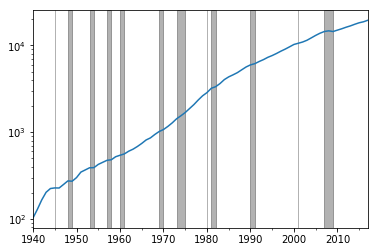

In [4]:
ax = df['Gross Domestic Product'].plot()
recessions_bars()
plt.semilogy()
plt.xlabel('')
plt.show()

In [5]:
Z = [
    'Durable goods',
    'Gross fixed investment residential',
    'Government consumption',
    'Gross government investment',
    'Exports', 
#    'Services',
#    'Inventory change'
]


#df['mu'] = 1 - df['Imports']/(df['Gross Domestic Product'])
df['mu'] = 1 - df['Imports']/(df['Gross Domestic Product'] + df['Imports'])
df['c'] = df['Nondurable goods']/df['Gross Domestic Product']
df['h'] = df['Private Domestic Investment']/df['Gross Domestic Product']

df['Autonomous (Z)'] = df[Z].sum(axis=1)

#df['Multiplier'] = (1/(1- df['c'] - df['h'] + df['mu']))
df['Multiplier'] = (df['mu']/(1-df['mu']*(df['c'] + df['h'])))

df['Y_SSM'] = df['Multiplier']*df['Autonomous (Z)']

df.tail()

,Gross Domestic Product,Imports,Nondurable goods,Durable goods,Services,Gross fixed investment residential,Government consumption,Gross government investment,Private Domestic Investment,Exports,Inventory change,mu,c,h,Autonomous (Z),Multiplier,Y_SSM
DATE,,,,,,,,,,,,,,,,,
2013-01-01,16784.851,2764.210,2540.559,1189.413,7587.238,509.988,2532.006,600.403,2211.494,2273.428,104.531,0.858601,0.151360,0.131755,7105.238,1.134341,8059.761889
2014-01-01,17521.747,2879.284,2619.154,1242.357,7962.521,560.148,2565.199,601.841,2394.294,2371.027,84.490,0.858866,0.149480,0.136647,7340.572,1.138694,8358.664608
2015-01-01,18219.297,2786.461,2613.115,1306.566,8374.849,633.562,2612.706,621.504,2449.685,2265.047,128.724,0.867348,0.143426,0.134456,7439.385,1.142780,8501.582003
2016-01-01,18707.189,2738.146,2649.714,1346.604,8770.575,698.820,2659.488,631.491,2442.127,2217.576,28.940,0.872320,0.141641,0.130545,7553.979,1.143926,8641.193916
2017-01-01,19485.394,2928.596,2749.611,1406.481,9165.316,754.621,2731.254,643.189,2587.860,2350.175,25.484,0.869341,0.141111,0.132810,7885.720,1.141064,8998.107938


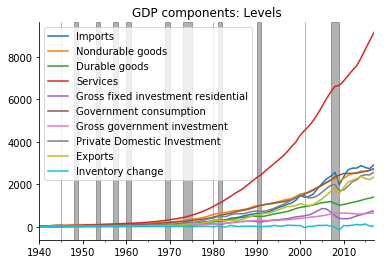

In [6]:
ax = df.drop(['Gross Domestic Product', 'Autonomous (Z)', 'Multiplier', 'mu', 'h', 'c', 'Y_SSM'], axis=1).plot()
recessions_bars()
plt.xlabel('')
plt.title('GDP components: Levels')
sns.despine()
sns.set_context('paper')
sns.set_style('white')
plt.show()

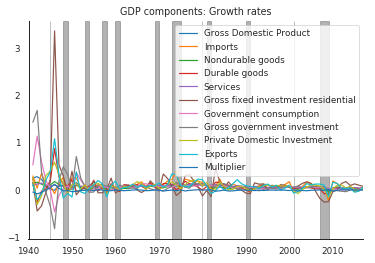

In [7]:
ax = df.drop(['Autonomous (Z)', 'mu', 'h', 'c','Inventory change', 'Y_SSM'], axis=1).pct_change().plot()
recessions_bars()
plt.xlabel('')
plt.title('GDP components: Growth rates')
sns.despine()
sns.set_context('paper')
sns.set_style('white')
plt.show()

Autonomous components

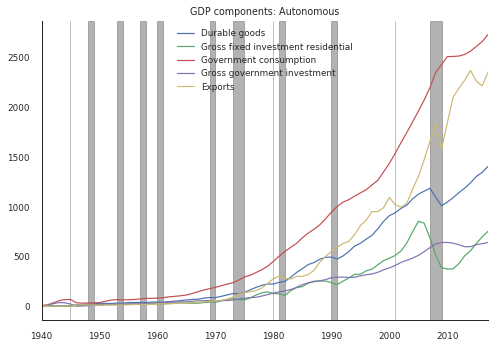

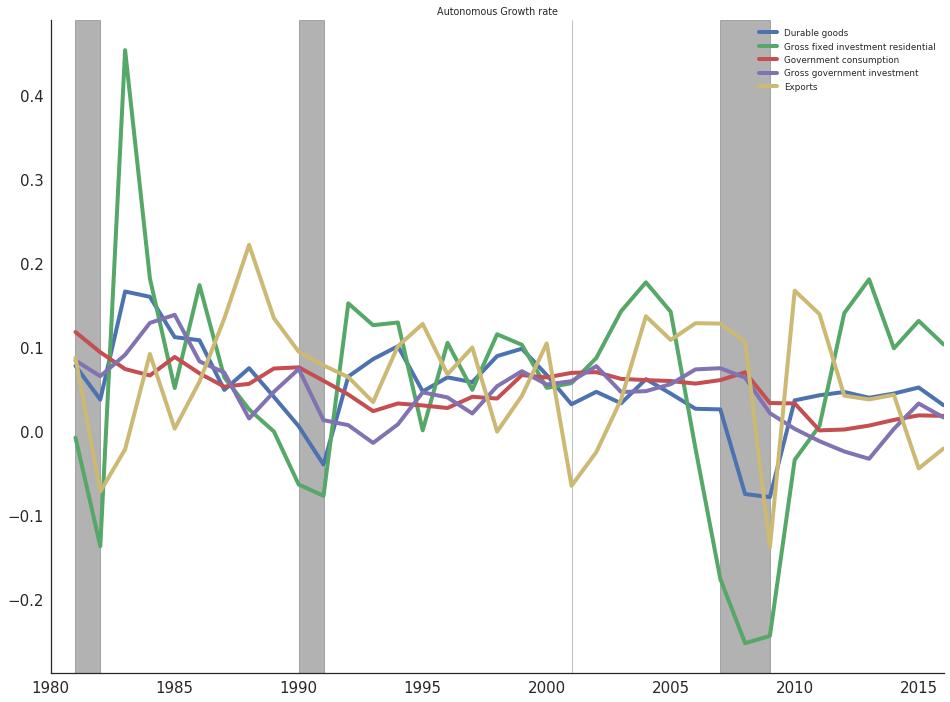

In [14]:
ax = df[Z].plot()
recessions_bars()
plt.xlabel('')
plt.title('GDP components: Autonomous')
sns.despine()
sns.set_context('paper')
sns.set_style('white')
plt.show()

plt.style.use('seaborn-white')
ax = df[Z]["1980" : "2016"].pct_change().plot(figsize = (16,12), fontsize=15, lw=4)
recessions_bars()
plt.xlabel('')
plt.title('Autonomous Growth rate')
sns.despine()
sns.set_context('paper')
sns.set_style('white')
plt.show()

Grouping by decades:

In [9]:
df.resample('10AS').mean()

,Gross Domestic Product,Imports,Nondurable goods,Durable goods,Services,Gross fixed investment residential,Government consumption,Gross government investment,Private Domestic Investment,Exports,Inventory change,mu,c,h,Autonomous (Z),Multiplier,Y_SSM
DATE,,,,,,,,,,,,,,,,,
1940-01-01,207.779200,6.744900,58.424400,14.052000,50.438300,6.591200,41.056000,17.776000,15.458000,9.3376,1.3909,0.968679,0.281174,0.072596,88.81280,1.482268,130.221127
1950-01-01,414.560200,17.135300,106.317700,37.111500,108.620500,22.287600,67.559100,25.793900,42.426200,18.3320,3.2470,0.960424,0.258022,0.101926,171.08410,1.468166,250.659971
1960-01-01,740.435100,33.027800,164.227000,64.050700,213.516900,33.820700,122.580700,48.721800,82.055900,37.1166,7.3724,0.957918,0.223820,0.109528,306.29050,1.407453,430.180364
1970-01-01,1710.695700,133.218500,343.040300,151.202200,541.198500,87.632700,285.945000,81.367600,212.907500,128.0018,12.6191,0.931501,0.202003,0.122192,734.14930,1.334556,975.226895
1980-01-01,4173.163200,417.234800,738.282600,357.375700,1515.539400,191.722000,665.274600,204.601200,562.044600,338.5640,16.9937,0.909630,0.179515,0.136028,1757.53750,1.276861,2230.157468
1990-01-01,7577.129800,874.107300,1177.264200,630.347000,3094.714000,326.450600,1133.721500,313.336800,964.596200,773.5552,37.2514,0.897792,0.156363,0.126021,3177.41110,1.202712,3816.322568
2000-01-01,12590.744600,1881.184900,1891.134300,1052.369800,5520.362600,623.385400,1923.796400,512.354100,1619.924900,1319.1182,9.4836,0.871206,0.150070,0.128938,5431.02390,1.151037,6238.395128
2010-01-01,17181.264875,2737.398375,2544.894375,1222.262875,7902.571625,543.070625,2579.816125,625.072625,2230.804125,2202.2260,67.9450,0.862211,0.148538,0.129433,7172.44825,1.133975,8136.899982


In [10]:
df[['Gross Domestic Product','Y_SSM','Autonomous (Z)', 'Multiplier']].round(3).tail()

,Gross Domestic Product,Y_SSM,Autonomous (Z),Multiplier
DATE,,,,
2013-01-01,16784.851,8059.762,7105.238,1.134
2014-01-01,17521.747,8358.665,7340.572,1.139
2015-01-01,18219.297,8501.582,7439.385,1.143
2016-01-01,18707.189,8641.194,7553.979,1.144
2017-01-01,19485.394,8998.108,7885.720,1.141


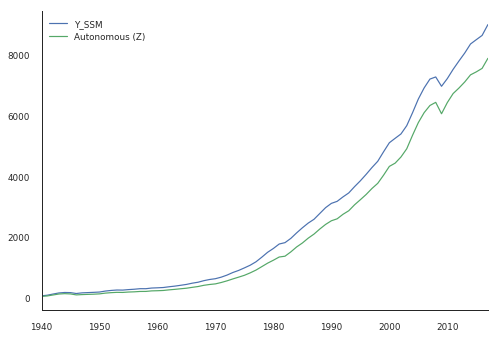

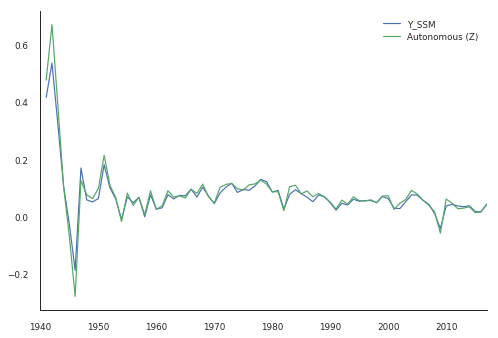

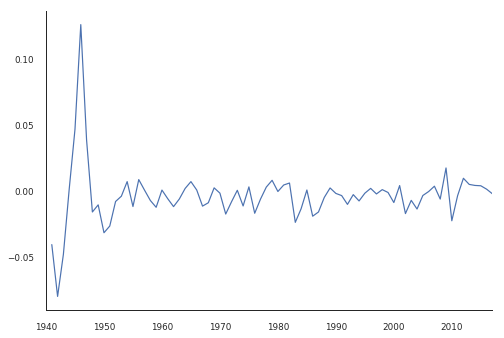

In [11]:
df[['Y_SSM', 'Autonomous (Z)']].plot()
plt.xlabel('')
sns.despine()
sns.set_context('paper')
sns.set_style('white')
plt.show()

df[['Y_SSM', 'Autonomous (Z)']].pct_change().plot()
plt.xlabel('')
sns.despine()
sns.set_context('paper')
sns.set_style('white')
plt.show()


df['Multiplier'].pct_change().plot()
plt.xlabel('')
sns.despine()
sns.set_context('paper')
sns.set_style('white')
plt.show()

# Decopositioning GDP growth

In [12]:
components = list(df.drop(['Gross Domestic Product','Autonomous (Z)', 'mu', 'h', 'c','Inventory change', 'Y_SSM', 'Multiplier'], axis=1).columns)

gdf = df[components].pct_change()

decomp = pd.DataFrame()

for i in components[1:]:
    product = df[i]*(gdf[i].iloc[1:])
    decomp[i] = (product*df['Multiplier'].iloc[1:]/df['Gross Domestic Product'].iloc[0:]).dropna()
    
decomp['Imports'] = ((df['Multiplier']/df['mu'])*df['mu'].pct_change()).iloc[1:].dropna()
decomp['Total'] = decomp.sum(axis=1)
decomp['GDP'] = df['Gross Domestic Product'].pct_change().dropna()
decomp.head()

,Nondurable goods,Durable goods,Services,Gross fixed investment residential,Government consumption,Gross government investment,Private Domestic Investment,Exports,Imports,Total,GDP
DATE,,,,,,,,,,,
1941-01-01,0.064810,0.028623,0.037975,0.007733,0.105594,0.180566,0.033683,0.007637,-0.001676,0.464945,0.256659
1942-01-01,0.060610,-0.016379,0.041070,-0.008688,0.347053,0.408065,-0.019234,-0.007382,0.009047,0.814162,0.283375
1943-01-01,0.039985,-0.001011,0.041697,-0.003399,0.224561,0.097514,-0.005239,-0.002043,-0.004013,0.388052,0.223751
1944-01-01,0.024963,0.001659,0.029546,-0.000404,0.088205,-0.009797,0.015580,0.006022,0.000215,0.155989,0.105193
1945-01-01,0.038554,0.009651,0.027944,0.002415,0.003631,-0.051640,0.029250,0.016012,-0.003234,0.072584,0.015861


<Figure size 576x396 with 0 Axes>

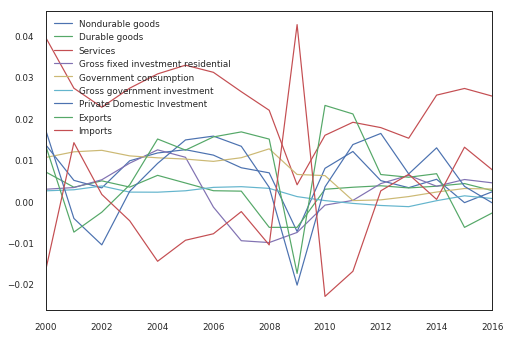

In [13]:
fig = plt.figure()
decomp["2000":"2016"].drop(['Total','GDP'], axis=1).plot()
plt.xlabel('')
plt.show()